In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
data = pd.read_csv('rps_data.csv')
dataset = np.array(data)


In [3]:
features = dataset[:, 1:2501]
labels = dataset[:, 0]
labels = labels.reshape(labels.shape[0], 1)

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)
encoded_y = label_encoder.transform(labels)

/Users/kimberlyjharrison/anaconda3/envs/rps/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kimberlyjharrison/anaconda3/envs/rps/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(features, one_hot_y, random_state=0,
                                                        test_size=0.2)

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [8]:
print("Training Data Info")
print("Training Data Shape:", train_x.shape)
print("Training Data Labels Shape:", train_y.shape)

Training Data Info
Training Data Shape: (1750, 2500)
Training Data Labels Shape: (1750, 3)


In [9]:
model = keras.Sequential()

In [10]:
train_x.shape[1]

2500

In [11]:
model.add(Dense(100, activation='relu', input_dim=train_x.shape[1]))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.add(Dense(100, activation='relu'))

In [13]:
num_classes=3
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               250100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 260,503
Trainable params: 260,503
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
train_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [18]:
# Fit (train) the model
model.fit(train_x, train_y, epochs=10, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 1s - loss: 0.9366 - acc: 0.5794
Epoch 2/10
 - 1s - loss: 0.6562 - acc: 0.7714
Epoch 3/10
 - 1s - loss: 0.5944 - acc: 0.7777
Epoch 4/10
 - 1s - loss: 0.4792 - acc: 0.8154
Epoch 5/10
 - 1s - loss: 0.4203 - acc: 0.8366
Epoch 6/10
 - 1s - loss: 0.3787 - acc: 0.8509
Epoch 7/10
 - 1s - loss: 0.2810 - acc: 0.8949
Epoch 8/10
 - 1s - loss: 0.1995 - acc: 0.9309
Epoch 9/10
 - 1s - loss: 0.2226 - acc: 0.9160
Epoch 10/10
 - 1s - loss: 0.1979 - acc: 0.9291


In [19]:
# Save the model
model.save('rps_trained.h5')

In [61]:
model_loss, model_accuracy = model.evaluate(test_x, test_y, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.2977 - acc: 0.8767
Loss: 0.29773945888700004, Accuracy: 0.8767123222351074


In [95]:
filepath = 'cap.png'

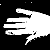

In [96]:
# Import the image using the `load_img` function in keras preprocessing
from tensorflow.keras.preprocessing import image

image_size = (50, 50)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [97]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(50, 50, 1)

In [98]:
img = image.flatten().reshape(-1, 50*50)
img.shape

(1, 2500)

In [99]:
img.shape

(1, 2500)

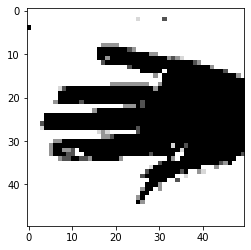

In [100]:
plt.imshow(img.reshape(50, 50), cmap=plt.cm.Greys)

In [101]:
model.predict_classes(img)
print(f"One-Hot-Encoded Prediction: {model.predict(img).round()}")
print(f"Predicted class: {model.predict_classes(img)}")

One-Hot-Encoded Prediction: [[0. 1. 0.]]
Predicted class: [1]


In [102]:
train_x

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=object)

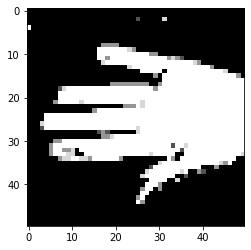

In [103]:
img = 1 - img
plt.imshow(img.reshape(50, 50), cmap=plt.cm.Greys)

In [104]:
num=3
test = np.expand_dims(train_x[num], axis=0)
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")
print(f"Actual Class: {train_y[num]}")

One-Hot-Encoded Prediction: [[1. 0. 0.]]
Predicted class: [0]
Actual Class: [1. 0. 0.]


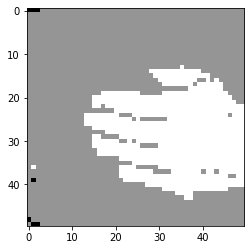

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_x)
plt.imshow(scaler.inverse_transform(test).reshape(50, 50), cmap=plt.cm.Greys)